<a href="https://colab.research.google.com/github/Thejasmayur31/SCT_DS_1/blob/main/SCT_DS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11/07/2025

# **TASK 01**
Create a **bar chart** or **histogram** to visualize the distribution of a ***categorical or continuous variable ***(e.g., age or gender in a population).

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/population_by_age_group.csv')
df.head()

,Country,Total,65+,25-64 years,15-24 years,5-14 years,0-4 years
0,Afghanistan,40099460,964016,12995277,8727160,10922454,6490554
1,Albania,2854710,463442,1527360,399113,323402,141393
2,Algeria,44177964,2731079,21871300,6007614,8697129,4870841
3,American Samoa,45056,3088,22433,7141,8365,4029
4,Andorra,79057,11499,48651,8570,7797,2540


In [16]:
df.isnull().sum()

,0
Country,0
Total,0
65+,0
25-64 years,0
15-24 years,0
5-14 years,0
0-4 years,0


In [17]:
df.columns = df.columns.str.strip()   # strip()--> this function eleminates accidental spaces in columns

In [18]:
df.rename(columns={  # These make it hard or unsafe to access columns using dot notation eg--> df.65+  which is invalid
    '65+': '65_plus',
    '25-64 years': '25_64',
    '15-24 years': '15_24',
    '5-14 years': '5_14',
    '0-4 years': '0_4'
}, inplace=True)

In [19]:
df.head()

,Country,Total,65_plus,25_64,15_24,5_14,0_4
0,Afghanistan,40099460,964016,12995277,8727160,10922454,6490554
1,Albania,2854710,463442,1527360,399113,323402,141393
2,Algeria,44177964,2731079,21871300,6007614,8697129,4870841
3,American Samoa,45056,3088,22433,7141,8365,4029
4,Andorra,79057,11499,48651,8570,7797,2540


In [20]:
age_cls = ['0_4', '5_14', '15_24', '25_64', '65_plus']   # in list because it is easy for looping , slicing etc
age_cls

['0_4', '5_14', '15_24', '25_64', '65_plus']

In [21]:
df[age_cls + ['Total']]=df[age_cls + ['Total']].apply(pd.to_numeric,errors='coerce')

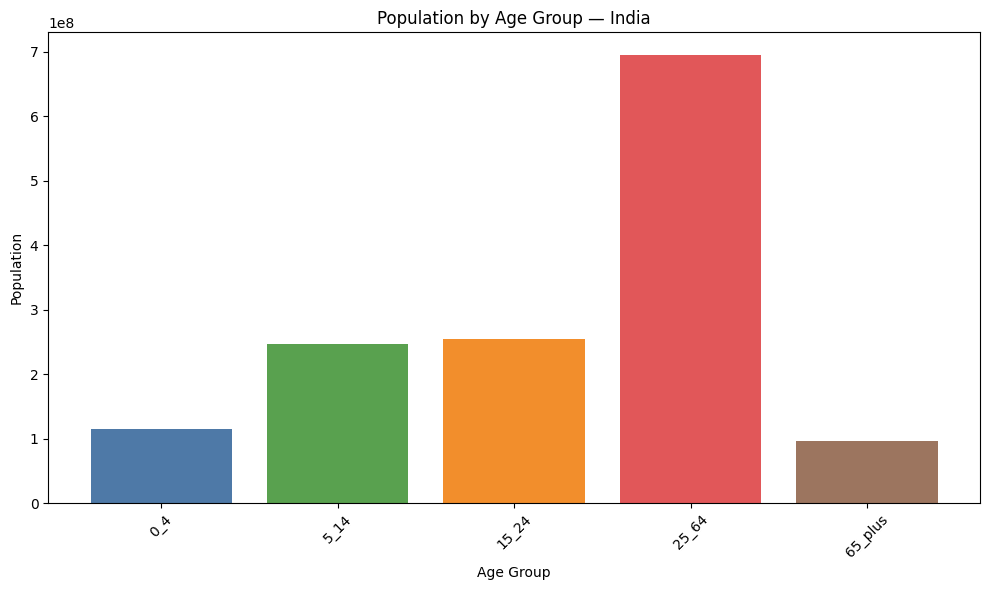

In [24]:
plt.figure(figsize=(10, 6))


colours = ['#4e79a7', '#59a14f', '#f28e2c', '#e15759', '#9c755f']

country = row['Country'].iloc[0]

for i, group in enumerate(age_cls):
    plt.bar(group, row[group], color=colours[i])

plt.title(f'Population by Age Group — {country}')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

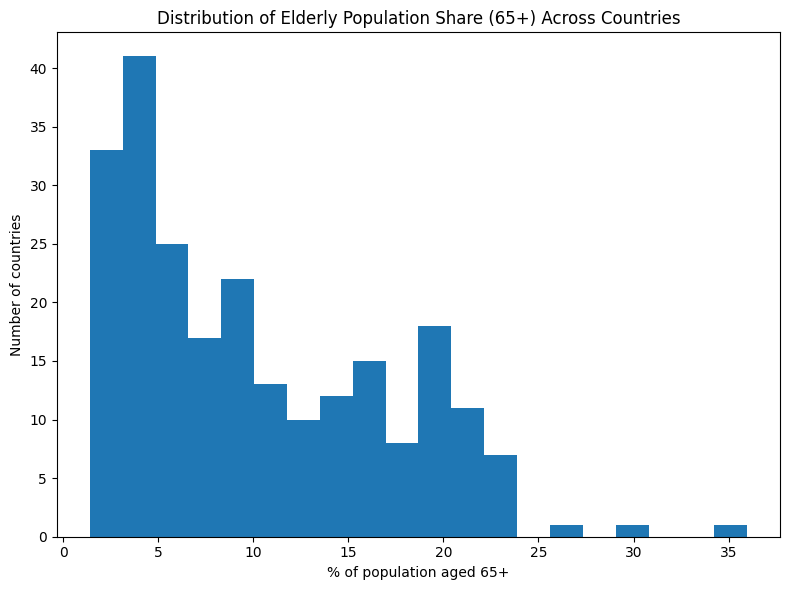

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['65_plus'] / df['Total'] * 100, bins=20)
plt.title('Distribution of Elderly Population Share (65+) Across Countries')
plt.xlabel('% of population aged 65+')
plt.ylabel('Number of countries')
plt.tight_layout()
plt.show()